# <font color='greyblue'>Support Vector Machine: A Sentimental Analysis Case Study</font>

## Task 1: Loading the dataset
_______

In [ ]:
!wget "https://raw.githubusercontent.com/TheClub4/IMDB_Sentiment_Analysis/master/movie_data.csv"

--2021-11-14 19:47:58--  https://raw.githubusercontent.com/TheClub4/IMDB_Sentiment_Analysis/master/movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘movie_data.csv’

movie_data.csv      100%[===================>]  62.81M   167MB/s    in 0.4s    

2021-11-14 19:47:59 (167 MB/s) - ‘movie_data.csv’ saved [65862309/65862309]



In [ ]:
import pandas as pd
df = pd.read_csv('movie_data.csv')
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = (['The sun is shining',
         'The weather is sweet',
         'The sun is shining, the weather is sweet, and one and one is two'])
bag = count.fit_transform(docs)

print(count.vocabulary_)
print(bag.toarray())

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}
[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(bag).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


# Task 2: Data Cleaning
___

In [ ]:
import re
def preprocessor(text):
  text =re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
  
  return text

preprocessor("This is a :) test :-( !")

'this is a test :) :('

In [ ]:
# preprocess data
df['review'] = df['review'].apply(preprocessor)

# Task 3: Tokenization
___

In [ ]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
  return text.split()

def tokenizer_stemmer(text):
  return[porter.stem(word) for word in text.split()]

tokenizer('runners like running thus they run')

['runners', 'like', 'running', 'thus', 'they', 'run']

In [ ]:
tokenizer_stemmer('runners like running thus they run')

['runner', 'like', 'run', 'thu', 'they', 'run']

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokenizer_stemmer('runners like running thus they run') if w not in stop]

['runner', 'like', 'run', 'thu', 'run']

# Task 4: Transform Text Data into TF-IDF Vectors
___

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                         lowercase=True,
                         preprocessor=None,  # applied preprocessor in Data Cleaning
                         tokenizer=tokenizer_stemmer,
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

y = df.sentiment.values
X = tfidf.fit_transform(df.review)

In [ ]:
# save train/test data
#np.save("movie_trainX.npy",X)
#np.save("movie_trainy.npy",y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!mkdir "/content/drive/MyDrive/movie_dataset"
#!cp "/content/movie_trainX.npy" "/content/drive/MyDrive/movie_dataset"
#!cp "/content/movie_trainy.npy" "/content/drive/MyDrive/movie_dataset"

In [ ]:
!cp "/content/drive/MyDrive/movie_dataset/movie_trainX.npy" "."
!cp "/content/drive/MyDrive/movie_dataset/movie_trainy.npy" "."

In [ ]:
import numpy as np
X=np.load("movie_trainX.npy", allow_pickle=True)
y=np.load("movie_trainy.npy", allow_pickle=True)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
from scipy.sparse import csr_matrix
X=csr_matrix(X, shape=(50000,73814)).toarray()

ValueError: ignored

# Task 5: Document Classification using Support Vector Machine
___

In [ ]:
# https://scikit-learn.org/stable/modules/cross_validation.html
import pickle
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

(25000, 73814) (25000,) (25000, 73814) (25000,)


0.89492

In [ ]:
saved_model = open('svc_lin_model.sav', 'wb')
pickle.dump(clf, saved_model)
saved_model.close()

In [ ]:
from sklearn.metrics import accuracy_score
# Get predictions on the test set
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1, verbose=3)
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 116.3min finished


array([0.9 , 0.9 , 0.91, 0.9 , 0.9 ])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.00


In [ ]:
saved_model = open('svm_5fold_model.sav', 'wb')
pickle.dump(clf, saved_model)
saved_model.close()

In [ ]:
!cp "/content/svm_5fold_model.sav" "/content/drive/MyDrive/movie_dataset/svm_5fold_model.sav"
!cp "/content/svc_lin_model.sav" "/content/drive/MyDrive/movie_dataset/svm_lin_model.sav"

# Task 6: Model Evaluation
___

In [ ]:
filename = 'svc_lin_model.sav'
saved_clf = pickle.load(open(filename, 'rb'))

In [ ]:
clf.score(X_test, y_test)

0.89492

In [ ]:
yhat = clf.predict(X_test)
yhat

array([0, 1, 1, ..., 0, 1, 1])

### Confusion matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[11190  1283]
 [ 1344 11183]]


Confusion matrix, without normalization
[[11190  1283]
 [ 1344 11183]]


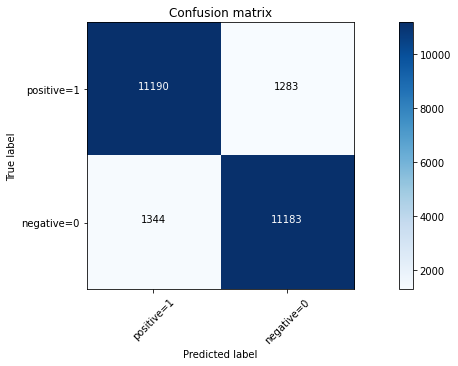

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')